NB: Change this for future years. Needs to:
        (a) ask more questions
        (b) have less text
        (c) have more images, interactions, visualizations, etc.
        (d) include more analogies, anecdotes

importing Jupyter notebook from Lesson4_sinusoids.ipynb


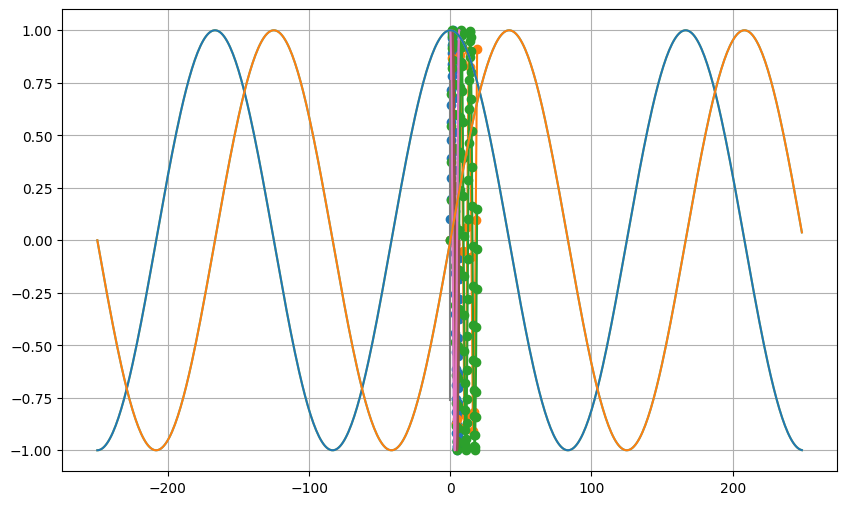

In [1]:
from IPython.display import Math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (10, 4)
#import mpld3 
#mpld3.enable_notebook()
#%config InlineBackend.figure_format = 'svg'
import import_ipynb
from Lesson4_sinusoids import hide_toggle

In [2]:
def generate_matrix_dft(N, K):
    import numpy as np
    """Generate a DFT (discete Fourier transfrom) matrix
    Args:
        N: Number of samples
        K: Number of frequency bins
    Returns:
        dft: The DFT matrix
    """
    dft = np.zeros((K, N), dtype=np.complex128)
    for n in range(N):
        for k in range(K):
            dft[k, n] = np.exp(-2j * np.pi * k * n / N)
    return dft

#N = 32
#dft_mat = generate_matrix_dft(N, N)

def my_DFT(x):
    """Compute the discete Fourier transfrom (DFT)
    Args:
        x: Signal to be transformed
    Returns:
        X: Fourier transform of `x`
    """
    x = x.astype(np.complex128)
    N = len(x)
    dft_mat = generate_matrix_dft(N, N)
    return np.dot(dft_mat, x)

hide_toggle()

In [3]:
def genComplexSine(k, N):

    import numpy as np
    int(N) if N >= 1 else False
    int(k) if 0 < k < (N - 1) else False
    n = np.arange(0,N)
    
    cSine = np.exp(1j * 2 * np.pi * k * n / N)
    return cSine



hide_toggle()

# DFT review

The DFT is an important concept in signal theory, mathematics, and has important implications for music processing. The DFT is a process for decomposing a harmonic signal into it's individual components. Recall that in the first half we learned how to build sounds by adding sinusoids. In fact, *any compound waveform can be represented as the sum of multiple sinusoids.*

Because of this, the DFT allows us to *decompose* a signal into the parts from which it is summed.

The DFT can be understood as (a) the projection of a signal into a finite set of complex sine waves, or (b) a set of correlation values representing how similar the overall input signal is to a series of individual frequencies.

It is able to figure out how much of each sinusoidal ingredient is present in the signal. (Where each sinusoid has a period equal to k over N samples.)

### The DFT equation is shown below:

$$X[k] = \sum_{n=0}^{N-1} x(n) \cdot e^{-j 2\pi k n/N} , k = 0, ..., N-1$$

This equation is at the heart of all signal processing theory. It is important not to be afraid of this equation, but rather to understand the conceptual logic of it if you want to have a deep understanding of the DFT. Let's break down the components of this equation first.

Or, you may have seen the exponent written like this:

$$e^{-j \omega t}$$

or this:

$$e^{-j \theta}$$

Or possibly with $i$ instead of $j$. They all mean the same thing. Different subfields have different typical representations.

$$X[k] = \sum_{n=0}^{N-1} x(n) \cdot e^{-j 2\pi k n/N} , k = 0, ..., N-1$$

Where:  
$n$ = discrete time index<br>
$k$ = discrete frequency index<br>
$N$ = total number of samples<br>
$\omega_{k}$ = $2\pi k/N$ = frequency in radians

$$X[k] = \sum_{n=0}^{N-1} x(n) \cdot e^{-j 2\pi k n/N} k = 0, ..., N-1$$

$x$ is the input signal, where sample by sample ($x(n))$ is multiplied by a complex sinusoid at each value of k, then we sum over N (the total number of samples), and as a result we obtain a complex vector ($X$) from which we can compute the phase and magnitude values of frequency component $k$. Notice in this equation that the range of $k$ is related to the maximum value of $N$

Keep in mind that any time you are multiplying vectors and adding that (a) you are computing the dot product, and (b) you are performing correlation.

$$X[k] = \sum_{n=0}^{N-1} x(n) \cdot e^{-j 2\pi k n/N} k = 0, ..., N-1$$
The resulting output of the equation above is an array of complex values of length N, where each value stores the output of each **DFT coefficient** 

When we say 'coefficient' we mean the values of X(k), so X(0) is the first coefficient, X(1) is the second etc. 

But what does it really mean for a signal to be similar to a complex exponential? It makes much more sense if we break up the exponential into sine and cosine components using the following identity:

The DFT returns a complex array that can be expressed as a magnitude and a phase. In the magnitude spectrum, we identify the amount of some frequency content (k) in the signal. And in the phase spectrum, we see how the sinusoids are placed within the cycle length in radians with respect to time = zero.

Recall that using Euler's formula we can translate the complex exponential into the cosine (real) and sine (imaginary) parts of the same frequency:

$$e^{-j 2\pi k n/N} = \cos(2\pi k n/N) - j\sin(2\pi k n/N)$$

### Complex Numbers
The equation above is the "meat and potatoes" of the DFT. It is built on Euler's identity:

$e ^{j\pi} +1 =0$

which is famous for bringing together the five most important numbers in mathematics.

A complex number is any number with a real and an imaginary component. The complex number can be written as $a+jb$ where $j$ (or $i$) is the imaginary unit.

Knowing how to manipulate these complex numbers is therefore useful.

$a$ is called the `real` part of the number and $b$ is called the `imaginary` part of the number

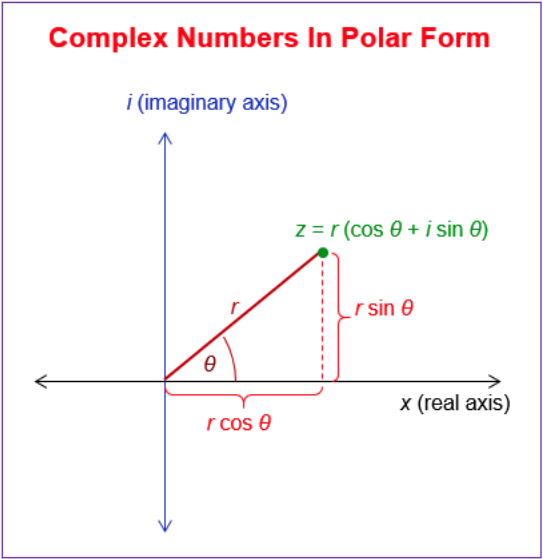

In [4]:
from IPython.display import Image
Image('../images/polarRectangular.png',width=400)

#### Rectangular to polar form of complex numbers

So we can express a point in a complex plane (i.e., a sample) in three ways:

$Z = a + jb$

or

$Z = r \angle \theta$

or

$Z = r(cos\ \theta + j\ sin\ \theta)$

conversion reminders:
To convert between these forms, the following are helpful reminders:

$sin\theta = \frac{b}{r}$

$cos\theta = \frac{a}{r}$

$r = \sqrt{a^2 + b^2} $

$\theta = arctan(\frac{b}{a})$

Or, to convert from polar to rectangular:

$a = r\ cos\theta$

$b = r\ sin\theta$

The absolute value of $Z$ is equal to $\sqrt{a^2 + b^2}$ which represents the length of the radius. This translates to the magnitude (or amplitude) of the sinusoidal component

The argument of Z is equal to $arctan(\frac{b}{a})$ which represents the phase of the component

And recall that there is nothing "imaginary" about $j$, it is simply a number equal to the root of negative one: 

$j = \sqrt{-1}$

## Back to DFT...

Let's figure out how to compose our DFT algorithm ourselves and demonstrate first using a complex sinusoid as our signal input (in reality we will deal with real-valued inputs -- more on that in a minute).

In [5]:
#First, create input signal, "s" with same properties as before
N = 64
k0 = 7 
n = np.arange(0,N)
s = np.exp(1j * 2 * np.pi * k0 * n / N) #create complex signal

X = np.array([]) #create empty array
#iterate over all sample indices:
for k in range(N):
    xp = np.exp(-1j * 2 * np.pi * k * n / N) #create complex exponential (i.e., frequency) at every k
    X = np.append(X, sum(s*xp))

To have a slightly more intuitive understanding of what's happening here, we can plot each `xp` against the signal, and we can print the value of the dot product:

dot product = (64+0j)


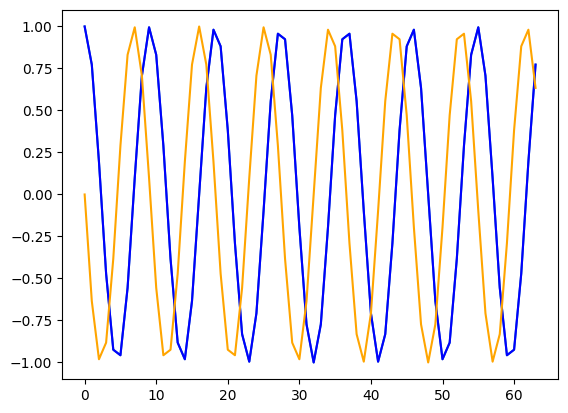

In [6]:
plt.plot(s.real)

xp = np.exp(-1j * 2 * np.pi * 7 * n / N) #manually change values of k
plt.plot(xp.real, 'b', xp.imag, 'orange');
cors = np.round(sum(s*xp),2)
print("dot product =", cors)

"X" is the output of the DFT which is a complex vector of length N. 

In [7]:
np.round(X, 1)

array([-0.+0.j, -0.-0.j,  0.-0.j,  0.-0.j,  0.+0.j, -0.-0.j,  0.+0.j,
       64.+0.j, -0.-0.j, -0.+0.j,  0.-0.j, -0.-0.j,  0.-0.j,  0.+0.j,
       -0.-0.j, -0.+0.j,  0.-0.j,  0.-0.j,  0.+0.j,  0.+0.j, -0.+0.j,
        0.+0.j, -0.-0.j, -0.+0.j,  0.-0.j,  0.-0.j, -0.+0.j, -0.-0.j,
        0.-0.j,  0.-0.j, -0.+0.j,  0.-0.j,  0.+0.j, -0.+0.j, -0.-0.j,
        0.-0.j,  0.-0.j, -0.-0.j, -0.-0.j, -0.+0.j,  0.+0.j, -0.-0.j,
       -0.+0.j, -0.-0.j,  0.-0.j, -0.+0.j,  0.-0.j, -0.+0.j,  0.-0.j,
        0.-0.j,  0.+0.j,  0.-0.j,  0.+0.j, -0.+0.j,  0.+0.j,  0.-0.j,
        0.+0.j,  0.+0.j, -0.-0.j,  0.-0.j,  0.+0.j, -0.-0.j,  0.-0.j,
       -0.-0.j])

From those values we can calculate the magnitude and phase of each component k in the signal. Again, the magnitude is equal to the radius, which we can get by taking 
$$r = \sqrt{a^2 + b^2}$$

Which is **equivalent to simply taking the absolute value of a complex number** (distance from origin).

In [8]:
c = np.complex64(64+0j)
a1 = np.sqrt((64**2) + (0**2))
a2 = np.abs(c)
print(a1, a2)

64.0 64.0


Text(0, 0.5, 'magnitude')

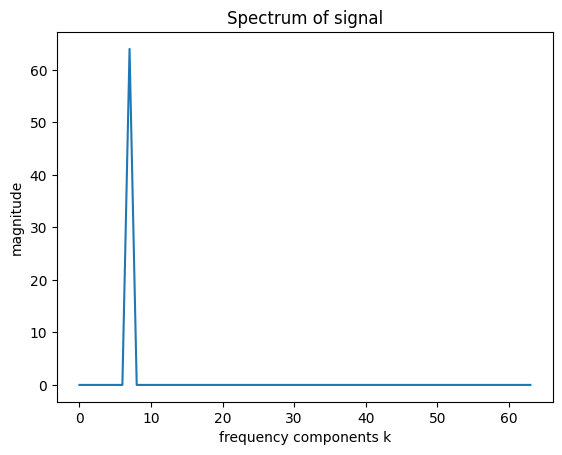

In [9]:
#Recall that our signal had a periodicity equal to 7.
plt.plot(np.abs(X));
plt.title('Spectrum of signal')
plt.xlabel('frequency components k')
plt.ylabel('magnitude')

## A smaller example: the long way

Let's expand our equation and perform some manual calculations.
If we want to perform a DFT on a signal of size N = 4, we will have 4 samples (n=0,1,2,3) and therefore 4 frequency bins (k=0,1,2,3) as output of the DFT. If we model this output for some sample, s, of length 4, we can see how the signal will be projected to these four sine waves.

$s_0 = \cos(2\pi * 0 * 0/4) - j\sin(2\pi * 0 * 0/4) = [1,1,1,1]$  
$s_1 = \cos(2\pi * 1 * 1/4) - j\sin(2\pi * 1 * 1/4) = [1,-j,-1,j]$  
$s_2 = \cos(2\pi * 2 * 3/4) - j\sin(2\pi * 2 * 2/4) = [1,-1,1,-1]$  
$s_3 = \cos(2\pi * 3 * 4/4) - j\sin(2\pi * 3 * 3/4) = [1,j,-1,-j]$

If we create a concrete example where x = [1,-1,1,-1] and compute the **dot product** (or **scalar product** e.g., multiply the signal by each **basis function** and sum):

### The Dot Product

Recall that in taking the dot product of two vectors, we simply perform vector-wise multiplication and then sum:

$ a = (3,4)$  
$ b = (0,1)$

$a \cdot b = (3 * 0) + (4 * 1) = 4$

In [10]:
import numpy as np
sig=np.array([1,-1,1,-1]) #create example signal
X_k = np.array([])

for k in range(4): 
    n_k = np.array([])
    for n in range(4):
        s_i = np.cos(2*np.pi*k*(n/4)) - 1j*(np.sin(2*np.pi*k*(n/4))) #create each sample of each basis function at all values of k
        print('n=',n,s_i)
        n_k = np.append(n_k, s_i)
    print('k equals',k,':',n_k)
    sc_prod = sum(n_k*sig) #compute dot product of signal and basis function
    #there is also a numpy function for this: 
    #sc_prod = np.dot(n_k,sig)
    X_k=np.append(X_k,sc_prod)

np.round(np.abs(X_k),1) # all of signal projects onto k = 2 which is the rate of our signal in Hz (2hz)

n= 0 (1+0j)
n= 1 (1+0j)
n= 2 (1+0j)
n= 3 (1+0j)
k equals 0 : [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
n= 0 (1+0j)
n= 1 (6.123233995736766e-17-1j)
n= 2 (-1-1.2246467991473532e-16j)
n= 3 (-1.8369701987210297e-16+1j)
k equals 1 : [ 1.0000000e+00+0.0000000e+00j  6.1232340e-17-1.0000000e+00j
 -1.0000000e+00-1.2246468e-16j -1.8369702e-16+1.0000000e+00j]
n= 0 (1+0j)
n= 1 (-1-1.2246467991473532e-16j)
n= 2 (1+2.4492935982947064e-16j)
n= 3 (-1-3.6739403974420594e-16j)
k equals 2 : [ 1.+0.0000000e+00j -1.-1.2246468e-16j  1.+2.4492936e-16j
 -1.-3.6739404e-16j]
n= 0 (1+0j)
n= 1 (-1.8369701987210297e-16+1j)
n= 2 (-1-3.6739403974420594e-16j)
n= 3 (5.51091059616309e-16-1j)
k equals 3 : [ 1.0000000e+00+0.0000000e+00j -1.8369702e-16+1.0000000e+00j
 -1.0000000e+00-3.6739404e-16j  5.5109106e-16-1.0000000e+00j]


array([0., 0., 4., 0.])

**The absolute value of the scalar product may be interpreted as a measure of similarity** between two vectors $x$ and $y$: if $x$ and $y$ point to the same direction (i.e., they are similar), the scalar product $|⟨𝑥|𝑦⟩|$ is large. If $x$ and $y$ are orthogonal (i.e., pointing in opposite directions), the inner product $|⟨𝑥|𝑦⟩|$ is zero.

Note: k is an index of a frequency bin. It is a frequency normalized over N (i.e., the total number of samples used in the transformation), while f usualy denotes frequency in Hz, this depends on the total number of samples analyzed and the sample rate. We can think of k as basically the same thing as f in different units. "k" is the number of periods in the N samples, "f" (Hz) is the number of periods in a single second (most commonly over 44,100 samples). 

In other words, if we think of N as our sample rate such that N always unfolds over 1 second, then k *is* equal to Hz. Note, however, that we will be using much smaller values of N than 44,100; and that we will be abstracting f & fs to k and N in order to better understand the DFT equation.


So, in sum: we are extracting the energy under each frequency "bin", or k periods inside the N samples. Think of the above as four "filters" to measure each possible "sinusoidal ingredient."

Let's look at a basic example. We'll generate a complex sinusoid of length 64 and k = 7. So this means we will have seven cycles over the time period of length N (64).

In [11]:
N = 64
k0 = 7 
n = np.arange(0,N)
s = np.exp(1j * 2 * np.pi * k0 * n / N) # this is our complex sinusoidal signal of N=64 and k=7

Here we can plot that to see that it looks right. **Note that by default if you pass a complex value to many functions it will automatically ignore the imaginary part.** This is true for `plt.plot` as well so we have to explicitly pass the real and imaginary parts separately.

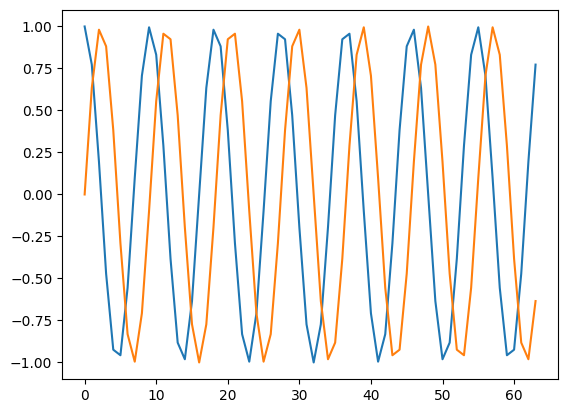

In [12]:
plt.plot(n, np.real(s), n, np.imag(s)) 

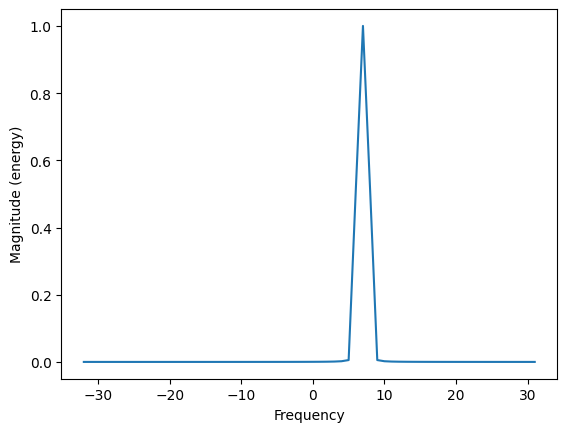

In [13]:
# recall pyplot has a "magnitude_spectrum" plotting function we can use for now - it assumes real-valued input
# notice that it cannot interpret the values of k (x axis) if we do not pass it a sample size. Using the wrong N will give erroneous output.
plt.magnitude_spectrum(s, N);  

Obviously, this is very perfect. It means that the entire signal projects onto (or correlates entirely with) one single sinusoidal coefficient (k = 7). This never happens when dealing with "real world" signals.

The magnitude spectrum for a complex sinusoid will have a single peak, whereas a real-valued sinusoid (i.e., not complex) will look like it has two (one positive, one negative around center at 0)

Let's demonstrate how this works with a real sinusoid. Recall that a real sinusoid can be expressed as the sum of two complex exponentials, so the DFT output for a single real-valued sinsoid will show two peaks. 

$$\cos(\omega t) = \frac{1}{2}(e^{j \omega t} + e^{-j \omega t})$$

We'll create a real-valued signal with the same properties as before:

In [14]:
N=64
k0 = 7.5
n = np.arange(N)
# s is real not complex:
s = np.cos(2* np.pi * k0 * n/N)# create a REAL signal at k0 = 7

X = np.array([]) #create empty array
#iterate over all sample indices:
for k in range(N):
    xp = np.exp(-1j * 2 * np.pi * k * n / N) #create complex exponential (i.e., frequency) at every k
    X = np.append(X, sum(s*xp))


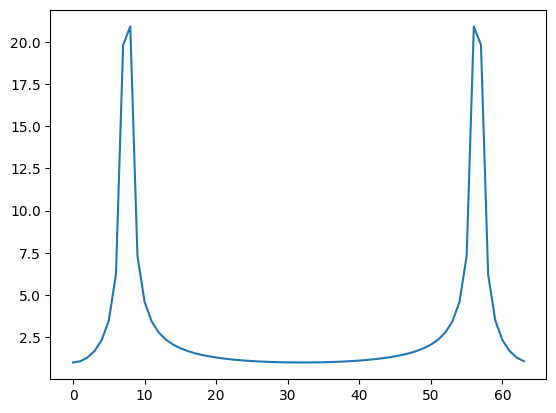

In [15]:
plt.plot(np.abs(X))

However, these values are misleading - they are plotted with regards to the values of x which are index values from 0 to 64. Because it *should represent* a symmetrical output around zero, we need to change how we calculate N. So instead of 0 : 64, we divide N by two and show from -N/2 to positive N/2. (Since we want to calculate and display the correct values of 7 and -7).

In fact, when working with real signals what's better is to create a different set of incides for the frequency and samples, that actually run from -N/2 to N/2 just to keep everything clear and tidy.

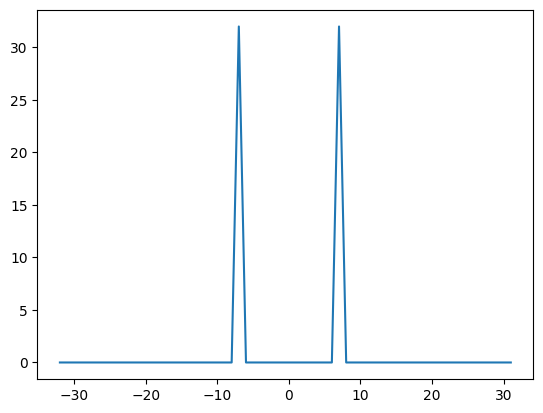

In [16]:
N=64
k0 = 7
s = np.cos(2* np.pi * k0/N * np.arange(N))#notice we subbed cos for exp and got rid of j

#REDO with altered indices:
nv = np.arange(N) # indices for samples
kv = np.arange(-N/2, N/2) # indices for frequency

X = np.array([]) #create empty array
#iterate over all sample indices and create complex exponential (i.e., frequency) at every k
for k in kv:
    xp = np.exp(-1j * 2 * np.pi * k * nv / N) 
    X = np.append(X, sum(s*xp))
    
plt.plot(kv, abs(X))

## Properties of DFT

**The resolution of k depends on the number of samples N.** We will obtain a more dense sampling along the frequency axis if we have longer samples (up to a point). Therefore, a larger value of N is expected to produce a finer representation of the signal in the frequency domain, (i.e. a better *frequency resolution*.)

However, this increasing frequency resolution is valid, **only as long as the signal remains stationary**, (i.e. as long as its properties do not change over time). When the signal changes over time, this DFT cannot be performed over the entire signal, we instead need to "cut up" the signal into fragments of time that are as unchanging as possible and compute the DFT over each one.

(More on this next time.)

## IDFT
One of the nice things about the DFT is that it is recomposable (or invertible). That is, we can get back the original signal from its spectrum. So it's a kind of synthesis, because we are recreating a whole out of many parts.

In order to run the inverse DFT, we take $X$, which is now our input vector of length N, (i.e., the resulting output of a DFT), and we return a set of samples--also of length N--which represent our original signal. 

The formula for the IDFT is very similar to the DFT (which is to be expected). 


$$x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \cdot e^{j 2\pi k n/N} , n = 0,...,N-1$$

...where the weight of each complex exponential is equal to the kth DFT coefficient. Said another way, 
X[k] can be understood as a measure of the intensity with which the respective frequency participates in
the signal x(n).

By summing these sinusoids, we are effectively performing the same synthesis activity we did earlier in the semester.

So now we iterate over every n (instead of k). Our output, "X" is the series of sums of all frequencies (k) over all possible samples:

In [17]:
# 'X' was the variable of the stored output of the DFT

N = 64
nv = np.arange(N) # indices for samples
kv = np.arange(-N/2, N/2) # indices for frequency

y = np.array([])
#recall capital 'X' above is our output from the DFT (or spectrum values)
#now iterate over n
for n in nv: 
    xp = np.exp(1j * 2 * np.pi * kv * n / N) #create complex exp at every n
    y = np.append(y, 1.0/N * sum(X*xp)) #note the factor of 1/N to normalize

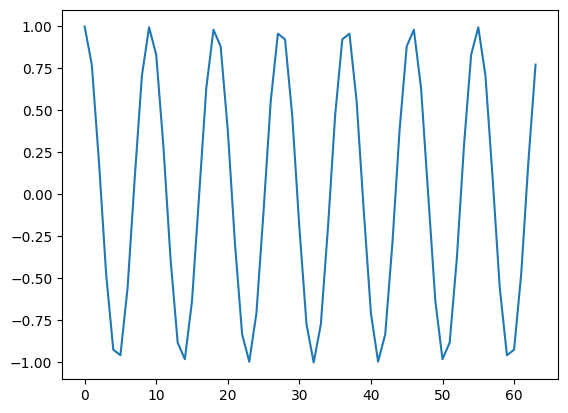

In [18]:
plt.plot(nv, y.real)

Note that the DFT will look very different for signals that are not perfect sinusoids:

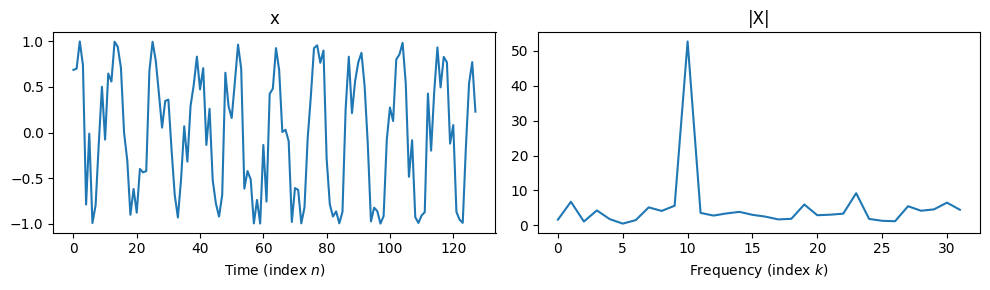

In [19]:
N = 128
n = np.arange(N)
k = 10
x = np.cos(2 * np.pi * (k * n / N) + 2 * (np.random.rand(N) - 0.5)) 
X = my_DFT(x)

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.title('x')
plt.plot(x)
plt.xlabel('Time (index $n$)')

plt.subplot(1, 2, 2)
plt.title('|X|')
plt.plot(np.arange(32),np.abs(X[:32])) # since the first half of the spectrum is all we need, it's common to ignore the second half
plt.xlabel('Frequency (index $k$)')
plt.tight_layout()